In [1]:
import cv2
import itertools
import numpy as np
from time import time
import mediapipe as mp
import matplotlib.pyplot as plt

In [2]:
mp_face_mesh = mp.solutions.face_mesh

face_mesh_images = mp_face_mesh.FaceMesh(static_image_mode=True, max_num_faces=2,
                                            min_detection_confidence=0.5)

mp_drawing = mp.solutions.drawing_utils

mp_drawing_styles = mp.solutions.drawing_styles

In [4]:
# import cv2
# import matplotlib.pyplot as plt


# sample=cv2.imread("")

# if sample_img is not None:
#     plt.figure(figsize=[10, 10])
#     plt.title("Sample Image")
#     plt.axis('off')
#     # Convert BGR image to RGB
#     plt.imshow(sample_img[:, :, ::-1])
#     plt.show()
# else:
#     print("Failed to load the image. Please check the file path and file permissions.")


Image loaded successfully!


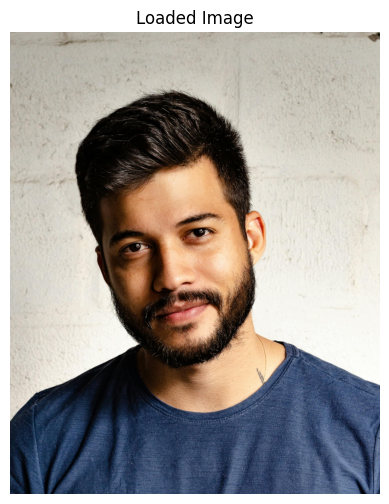

In [5]:
import cv2
import matplotlib.pyplot as plt

# Method 1: Using double backslashes
# file_path = "C:\\Users\\ANSH GUPTA\\OneDrive\\Desktop\\ML-Crate\\Facial Landmark Detection\\images\\pexels-italo-melo-881954-2379005.jpg"

# Method 2: Using a raw string
file_path = r"C:\Users\ANSH GUPTA\OneDrive\Desktop\ML-Crate\Facial Landmark Detection\images\pexels-italo-melo-881954-2379005.jpg"

# Read the image using OpenCV
image = cv2.imread(file_path)

# Check if the image has been loaded correctly
if image is not None:
    print("Image loaded successfully!")
    # Display the image using matplotlib to check if it's loaded
    plt.figure(figsize=(8, 6))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))  # Convert from BGR to RGB
    plt.title("Loaded Image")
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()
else:
    print("Failed to load the image. Please check the file path and ensure the file exists.")


In [6]:
face_mesh_results = face_mesh_images.process(image[:,:,::-1])

LEFT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_LEFT_EYE)))
RIGHT_EYE_INDEXES = list(set(itertools.chain(*mp_face_mesh.FACEMESH_RIGHT_EYE)))

if face_mesh_results.multi_face_landmarks:

    for face_no, face_landmarks in enumerate(face_mesh_results.multi_face_landmarks):

        print(f'FACE NUMBER: {face_no+1}')
        print('-----------------------')

        print(f'LEFT EYE LANDMARKS:n')

        for LEFT_EYE_INDEX in LEFT_EYE_INDEXES[:2]:

            print(face_landmarks.landmark[LEFT_EYE_INDEX])

        print(f'RIGHT EYE LANDMARKS:n')

        for RIGHT_EYE_INDEX in RIGHT_EYE_INDEXES[:2]:

            print(face_landmarks.landmark[RIGHT_EYE_INDEX])

FACE NUMBER: 1
-----------------------
LEFT EYE LANDMARKS:n
x: 0.48456648
y: 0.437069356
z: -0.00845739152

x: 0.49813503
y: 0.430548429
z: -0.0134481071

RIGHT EYE LANDMARKS:n
x: 0.320474088
y: 0.467759967
z: 0.013265281

x: 0.307410896
y: 0.478941292
z: 0.0343686678



c:\Users\ANSH GUPTA\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


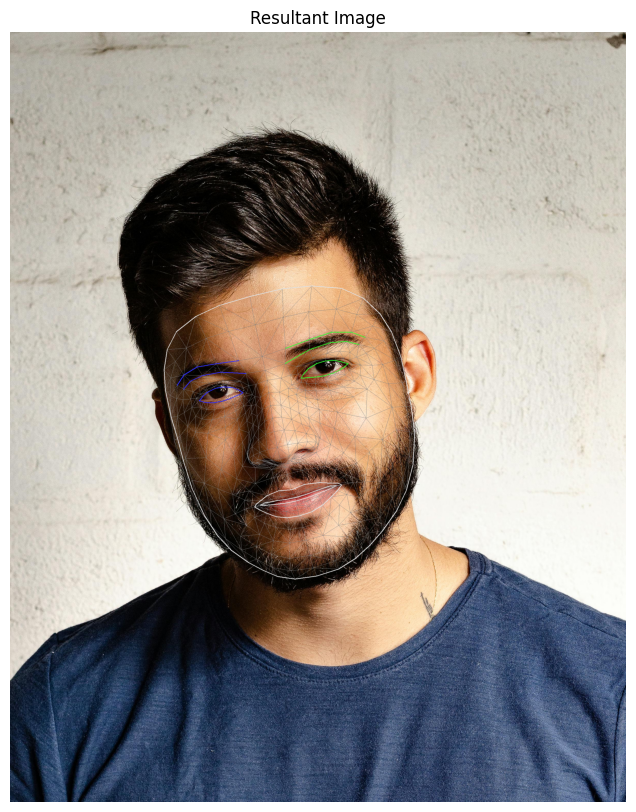

In [8]:
img_copy = image[:,:,::-1].copy()

if face_mesh_results.multi_face_landmarks:

    for face_landmarks in face_mesh_results.multi_face_landmarks:

        mp_drawing.draw_landmarks(image=img_copy, 
                                landmark_list=face_landmarks,connections=mp_face_mesh.FACEMESH_TESSELATION,
                                landmark_drawing_spec=None, 
                                connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_tesselation_style())
        
        mp_drawing.draw_landmarks(image=img_copy, landmark_list=face_landmarks,connections=mp_face_mesh.FACEMESH_CONTOURS,
                                    landmark_drawing_spec=None, 
                                    connection_drawing_spec=mp_drawing_styles.get_default_face_mesh_contours_style())

fig = plt.figure(figsize = [10, 10])
plt.title("Resultant Image");plt.axis('off');plt.imshow(img_copy);plt.show()